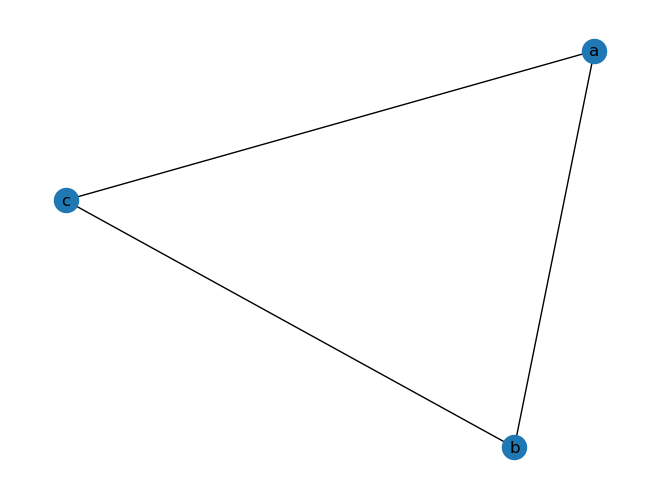

In [3]:
import networkx as nx
import warnings
import pandas as pd
import numpy as np
import powerlaw
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


g = nx.Graph()
g.add_node("a") #node нэмэх
g.add_edge("a", "b") #Edge nemeh
g.add_edge("a", "c") #Edge nemeh
g.add_edge("b", "c") #Edge nemeh
nx.draw(g ,with_labels=True) #durs uusgeh


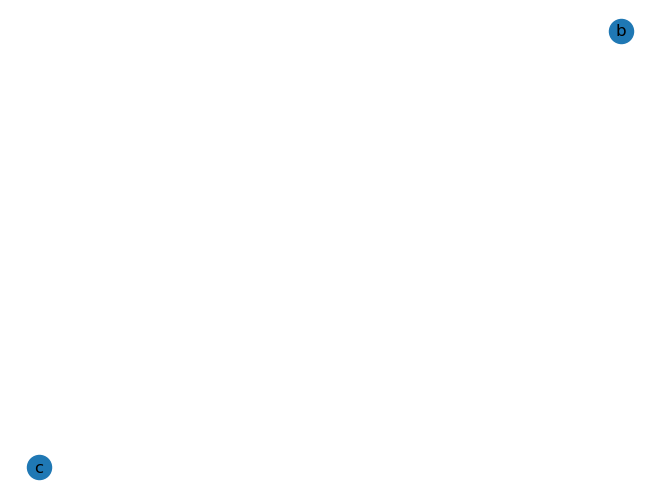

In [3]:
g.remove_node("a") #node a-g ustgah
g.remove_edge("b", "c") #b bolon c iin edge iig ustgah
#re-draw the graph
nx.draw(g, with_labels=True) #oorchlolt oruulsnii daraa dursleh

In [167]:
g = nx.read_edgelist("network.csv", delimiter=",", nodetype=int) #csv file aa unshih

In [169]:
g.number_of_nodes() # node iin too

333

In [171]:
g.number_of_edges() #edge iin too

2519

In [173]:
g.is_directed() #chigleltei esehiig shalgah

False

In [175]:
g.degree(1) #node 1 n 16 oor node uudtei holbogdoj baina

16

In [159]:
sum(dict(g.degree()).values())/float(len(g))

2.0

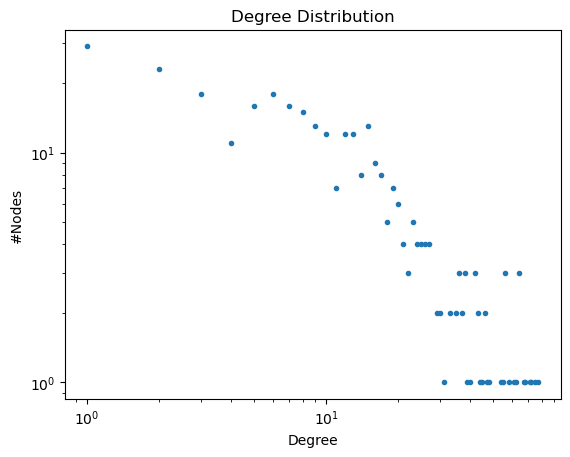

In [185]:
hist = nx.degree_histogram(g)
plt.plot(range(0, len(hist)), hist, ".") #tsegeer durselj, bolomjit gradusiig 
plt.title("Degree Distribution")  # dursiin garchig
plt.xlabel("Degree") #x tenhleg deh garchig
plt.ylabel("#Nodes") #y tenhleg deh garchig
plt.loglog()
plt.show() #dursiig haruulah

Calculating best minimal value for power law fit


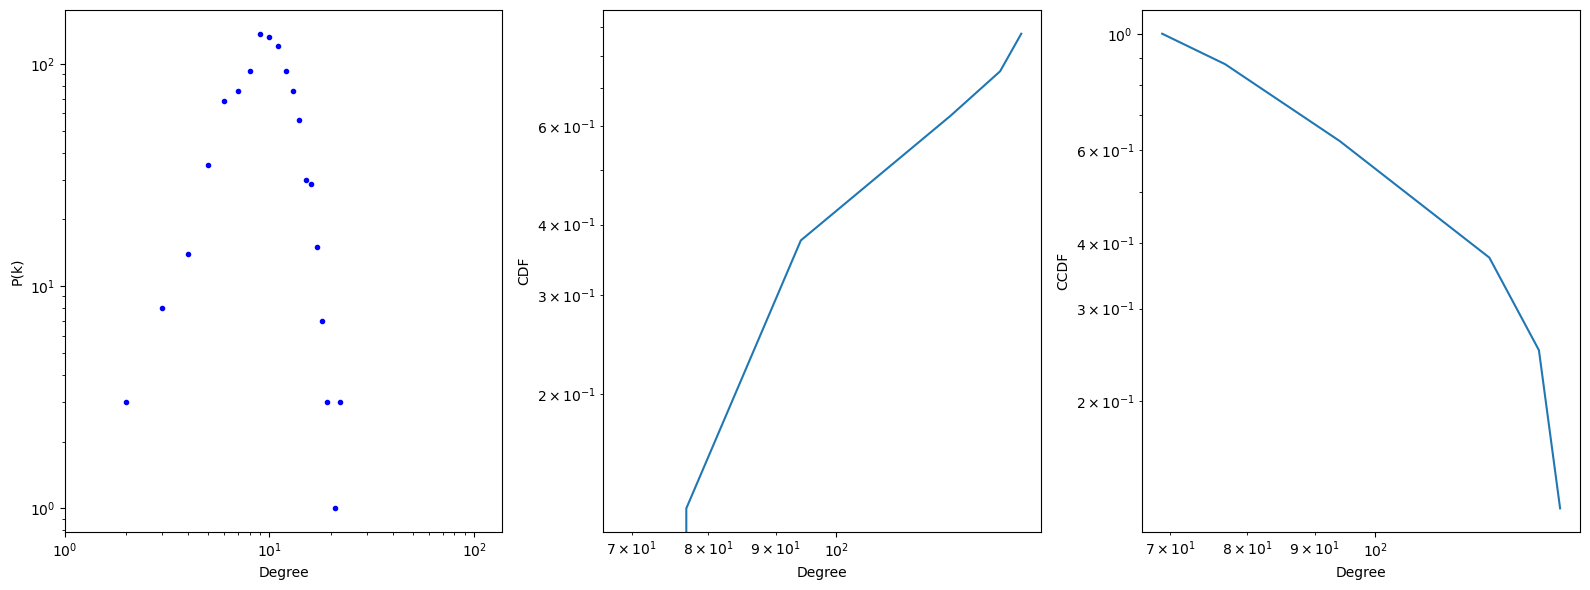

In [187]:
import networkx as nx
import numpy as np
import powerlaw
import matplotlib.pyplot as plt

def plot_dist(G):
    M = nx.to_scipy_sparse_array(G)
    xmin = min(d for _, d in G.degree())  # Get minimum degree
    indegrees = M.sum(axis=0)  # Sum along the columns to get degrees
    indegrees = np.array(indegrees).astype(int).flatten()  # Ensure it's an integer array

    degree = np.bincount(indegrees)  # Count degree occurrences
    fit = powerlaw.Fit(degree + 1, fit_method='KS')  # Avoid log(0) issues

    fig = plt.figure(figsize=(16, 6))

    # Plot Degree Distribution
    plt.subplot(1, 3, 1)
    plt.plot(range(len(degree)), degree, 'b.')
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim((min(degree[degree > 0]), max(degree)))  # Avoid zero values in log scale
    plt.xlabel('Degree')
    plt.ylabel('P(k)')

    # Plot CDF
    plt.subplot(1, 3, 2)
    fit.plot_cdf()
    plt.xlabel("Degree")
    plt.ylabel('CDF')

    # Plot CCDF
    plt.subplot(1, 3, 3)
    fit.plot_ccdf()
    plt.xlabel('Degree')
    plt.ylabel('CCDF')

    plt.tight_layout()
    plt.show()

# Example usage
G = nx.erdos_renyi_graph(1000, 0.01)  # Generate a random graph
plot_dist(G)


In [211]:
list(g.neighbors(1)) #1 node iin horsh 

[346, 315, 280, 53, 92, 73, 194, 322, 133, 48, 299, 54, 88, 119, 126, 236]

In [217]:
g.add_node(0)  # Add node 0


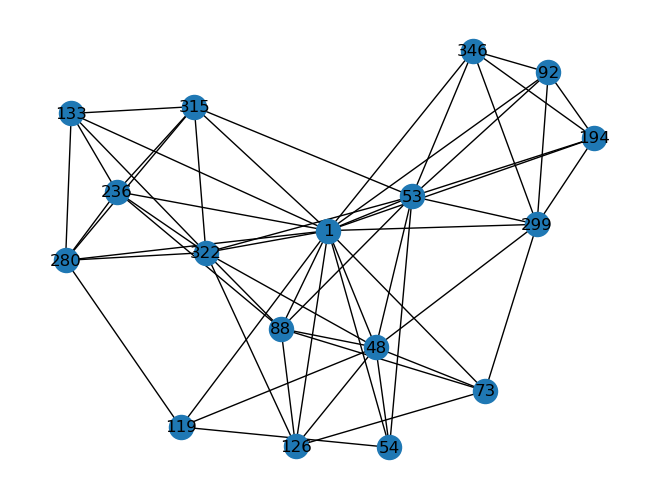

In [221]:
ego = nx.ego_graph(g, 1) # ego network of the node 0
nx.draw(ego, with_labels=True)


In [225]:
nx.number_connected_components(g)

6

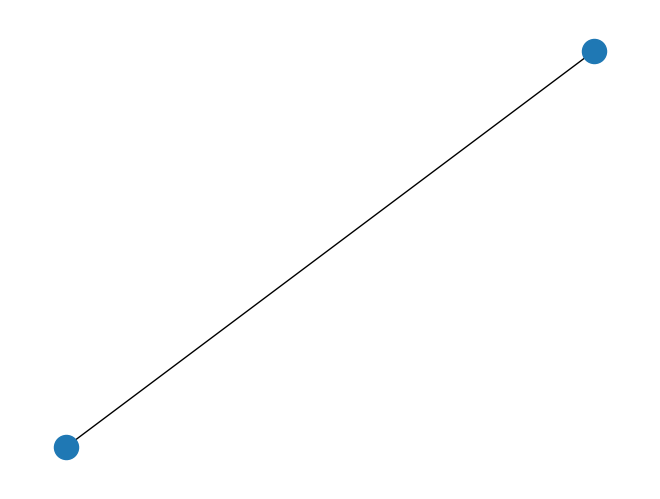

In [231]:
comps = list(nx.connected_components(g)) # get a list of connected components (for decreas
comp_1 = nx.subgraph(g, comps[1]) # build a subgraph on the second component
nx.draw(comp_1)

In [245]:
nx.shortest_path(g, source=1, target=30)

[1, 48, 30]

In [243]:
nx.shortest_path_length(g, source=1, target=30)


2

In [247]:
nx.diameter(g.subgraph(comps[0]))

11

In [257]:
nx.density(g)


0.045296793799787814

In [251]:
nx.triangles(g)[0]

0

In [259]:
nx.clustering(g)[0] 

0

In [261]:
nx.average_clustering(g)

0.5067228515248443

In [263]:
nx.average_clustering(g) 

0.5067228515248443

In [13]:
import networkx as nx

# Read CSV manually, skipping the header
G = nx.read_edgelist("Social_Network_Ads.csv", delimiter=",", nodetype=int, data=False)

In [15]:
g.number_of_nodes()


3

In [17]:
g.number_of_edges()

3

In [19]:
g.is_directed()

False

In [43]:
G = nx.read_edgelist("Social_Network_Ads.csv", delimiter=",", nodetype=int, data=False)


In [47]:
print(35 in G.nodes)  # Should return True if node 35 exists
print(list(G.nodes)[:10])  # Print first 10 nodes to verify node format


True
[19, 19000, 35, 20000, 26, 43000, 27, 57000, 76000, 58000]


In [51]:
G.degree(35) # degree for node 1

29

In [53]:
sum(dict(g.degree()).values())/float(len(g))

2.0

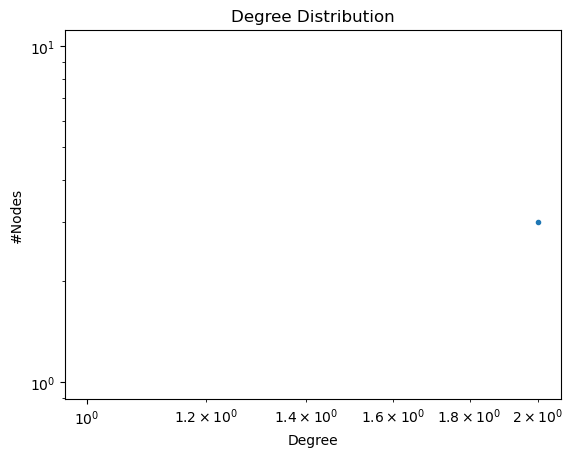

In [55]:
hist = nx.degree_histogram(g)
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()


Calculating best minimal value for power law fit


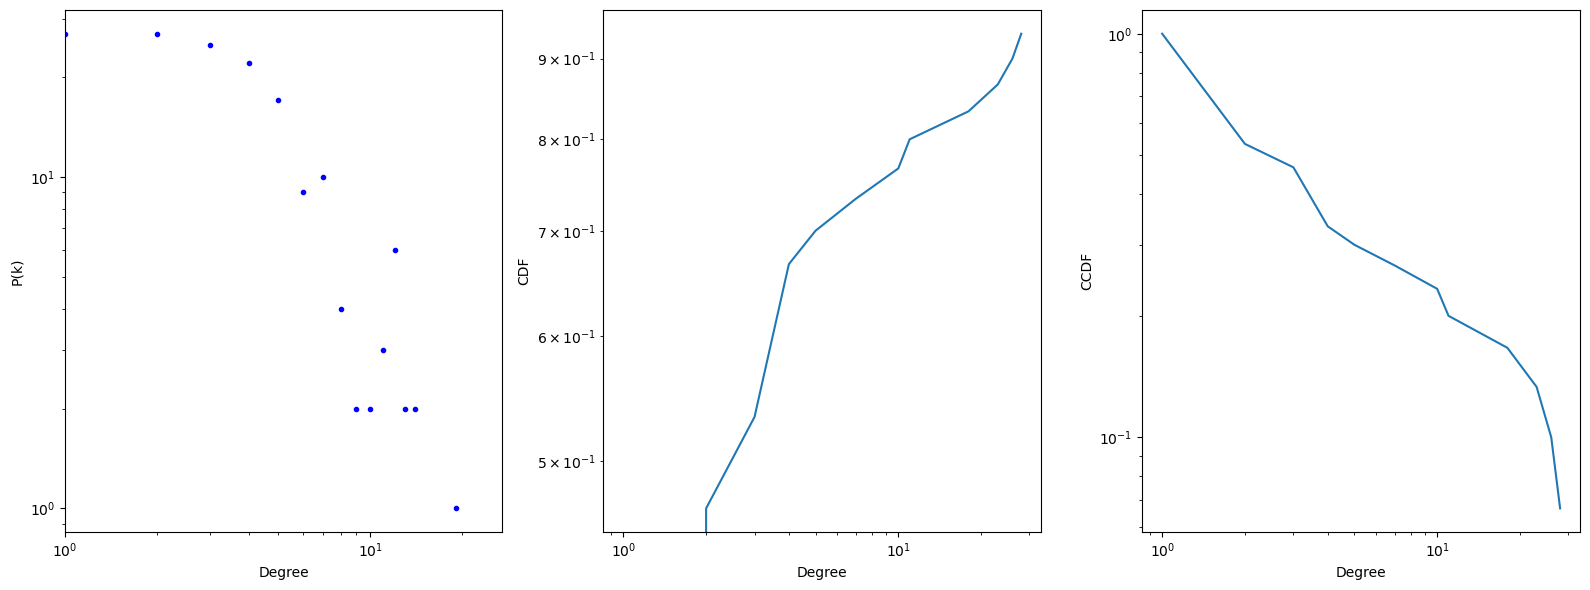

In [61]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import powerlaw

def plot_dist(G):
    if G.number_of_nodes() == 0:
        print("Graph is empty!")
        return
    
    # Convert Graph to SciPy sparse matrix
    M = nx.to_scipy_sparse_array(G)  # More recent function

    # Get node degrees
    degrees = [d for _, d in G.degree()]
    
    if len(degrees) == 0:
        print("No valid degrees found in graph!")
        return

    xmin = min(degrees)  # Smallest degree
    degree_counts = np.bincount(degrees)  # Degree frequency

    # Fit power-law distribution
    fit = powerlaw.Fit(np.array(degree_counts) + 1, fit_method='KS')

    # Create figure
    fig = plt.figure(figsize=(16, 6))

    """ Plot Degree Distribution """
    plt.subplot(1, 3, 1)
    plt.scatter(range(len(degree_counts)), degree_counts, color='b', marker='.')
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim((xmin, max(degree_counts)))
    plt.xlabel('Degree')
    plt.ylabel('P(k)')

    """ Plot CDF """
    plt.subplot(1, 3, 2)
    fit.plot_cdf()
    plt.xlabel("Degree")
    plt.ylabel("CDF")

    """ Plot CCDF """
    plt.subplot(1, 3, 3)
    fit.plot_ccdf()
    plt.ylabel("CCDF")
    plt.xlabel("Degree")

    plt.tight_layout()
    plt.show()

# Call the function
plot_dist(G)  # Ensure `G` is defined before calling


In [69]:
list(G.neighbors(35)) # obtain the list of neighobors for node 0

[20000,
 65000,
 27000,
 108000,
 23000,
 88000,
 50000,
 44000,
 25000,
 73000,
 75000,
 53000,
 59000,
 38000,
 71000,
 47000,
 72000,
 22000,
 39000,
 58000,
 91000,
 60000,
 147000,
 97000,
 77000,
 61000,
 57000,
 55000,
 79000]

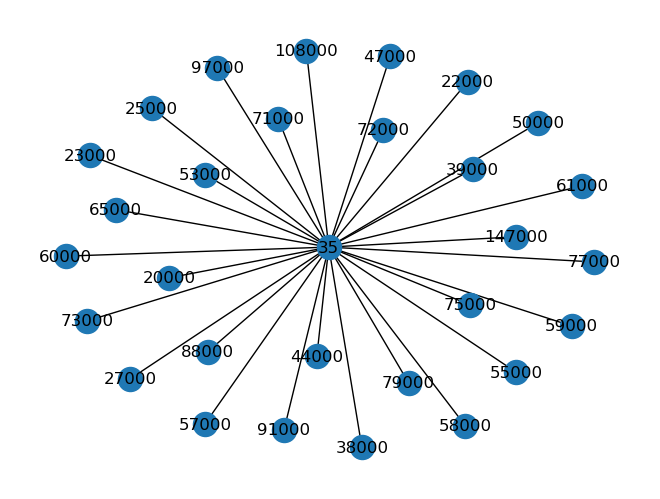

In [73]:
ego = nx.ego_graph(G, 35) # ego network of the node 0
nx.draw(ego, with_labels=True)

In [75]:
nx.number_connected_components(g)


1

In [83]:
nx.shortest_path(G, source=19, target=35)


[19, 25000, 35]

In [85]:
nx.shortest_path_length(G, source=19, target=35)


2

In [105]:
# Find all connected components (as subgraphs)
comps = list(nx.connected_components(G))


if len(comps) > 0:
    # Get the subgraph of the 36th component (0-based index)
    subG = G.subgraph(comps[0])
    
    # Compute diameter
    print(nx.diameter(subG))
else:
    print(f"Graph only has {len(comps)} components, so index 35 is out of range.")


8


In [107]:
nx.density(g)

1.0

In [133]:
nx.average_clustering(g)

1.0